# 边缘检测
边缘是像素明显变化的区域，并且具有丰富的语义信息，主要用于物体识别，几何、视角变换。边缘检测是图像处理与计算机是觉得重要技术主义，其目的是检测识别处图像中亮度变化剧烈的像素点构成的集合。通常状况下将边缘检测分为下面两个类型：
- 一阶微分为基础的边缘检测，通过计算图像的梯度值来检测图像边缘，如Sobel算子、Prewitt算子、Roberts算子以及差分边缘检测
- 二阶微分为基础的边缘检测，通过求二阶导数中的过零点来检测边缘，如拉普拉斯算子、高斯拉普拉斯算子、Canny算子边缘检测、Marr-Hildreth(LoG)边缘检测算子

#1 梯度算子
从梯度的角度来讲，梯度大的地方就是边缘。边缘就是像素值函数快速变化的区域，也就是一阶导数的极值区域![images](../images/12/22.png)
边缘提取的时候，先进行高斯去噪，在使用一阶导数来获取极值，这是因为一阶导数对噪声很敏感(域值法、01对比法)![images](../images/12/23.png)
- f是原始信号，可以看到在1000的时候，应该是一个边缘，其它地方的波动都是噪声
- g是高斯卷积，用来去噪声
- $f*g$就是使用高斯去噪的结果，发现噪声没有了，波动也有所缓和

在数学中，与变化率有关的就是导数。如果灰度图像的像素是连续的，那么我们可以在原图像熵分别对x方向和y方向求导数$G_x=\frac{\partial{G}}{\partial{x}}, G_y=\frac{\partial{G}}{\partial{y}}$，那么梯度向量就是$|G_{xy}|=\sqrt{Gx^2+Gy^2}$，角度方向是$G_{xy}=arctan(\frac{G_y}{G_x})$，梯度向量的大小包含了x和y两个方向的边缘信息

但是实际上，图像矩阵是离散的，连续函数求变化率用的是导数，而离散函数求变化率用的是差分(用相邻的两个书的差来表示变化率)。其中x和y方向的差分就是$G_x(n,y)=G(x,y)-G(n-1,y), G_y(x,n)=G(x,n)-G(x,n-1)$，实际计算图像导数时，我们是通过原图像和一个算子进行卷积来完成的，这种方法是求图像的近似导数。

具体做法如下:
- 有些算子需要之前先去噪，使用高斯滤波等等
- 计算x方向上的差分，就用拿图片跟x方向的卷积核进行卷积运算，得到一个x方向上的梯度矩阵$G_x$
- 计算y方向上的差分，就用拿图片跟y方向的卷积核进行卷积运算，得到一个y方向上的梯度矩阵$G_y$
- 计算梯度向量，$|G_{xy}|=\sqrt{Gx^2+Gy^2}$

#2 边缘检测的算子
在具体介绍之前，先来一起看看边缘检测的一般步骤吧。
1. 滤波：边缘检测的算法主要是基于图像强度的一阶和二阶导数，但导数通常对噪声很敏感，因此必须采用滤波器来改善与噪声有关的边缘检测器的性能。常见的滤波方法主要有高斯滤波。
2. 增强：增强边缘的基础是确定图像各点邻域强度的变化值。增强算法可以将图像灰度点邻域强度值有显著变化的点凸显出来。在具体编程实现时，可通过计算梯度幅值来确定。
3. 检测：经过增强的图像，往往邻域中有很多点的梯度值比较大，而在特定的应用中，这些点并不是我们要找的边缘点，所以应该采用某种方法来对这些点进行取舍。实际工程中，常用的方法是通过阈值化方法来检测。

最优边缘检测的三个主要评价标准:
1. 低错误率: 标识出尽可能多的实际边缘，同时尽可能的减少噪声产生的误报。
2. 高定位性: 标识出的边缘要与图像中的实际边缘尽可能接近。
3. 最小响应: 图像中的边缘只能标识一次，并且可能存在的图像噪声不应标识为边缘。

##2.1 一阶算子

###2.1.1 Prewitt算子
Prewitt算子是一种一阶微分算子的边缘检测，利用像素点上下、左右邻点的灰度差，在边缘处达到极值检测边缘，去掉部分伪边缘，对噪声具有平滑作用。其原理是在图像空间利用两个方向模板与图像进行邻域卷积来完成的，这两个方向模板一个检测水平边缘，一个检测垂直边缘。经典Prewitt算子认为：凡灰度新值大于或等于阈值的像素点都是边缘点。即选择适当的阈值T，若P(i,j)≥T，则(i,j)为边缘点，P(i,j)为边缘图像。这种判定是欠合理的，会造成边缘点的误判，因为许多噪声点的灰度值也很大，而且对于幅值较小的边缘点，其边缘反而丢失了
- 水平梯度$\begin{bmatrix}
-1&0&1\\
-1&0&1\\
-1&0&1
\end{bmatrix}=\begin{bmatrix}
-1&0&1
\end{bmatrix} \bigotimes \begin{bmatrix}
1\\
1\\
1
\end{bmatrix}$
- 垂直梯度$\begin{bmatrix}
1&1&1\\
0&0&0\\
-1&-1&-1
\end{bmatrix}=\begin{bmatrix}
1&1&1
\end{bmatrix} \bigotimes \begin{bmatrix}
-1\\
0\\
1
\end{bmatrix}$

Prewitt算子虽然能检测出图像边缘，但是检测结果较为粗糙，还带有大量的噪声,对噪声有抑制作用，抑制噪声的原理是通过像素平均，但是像素平均相当于对图像的低通滤波，所以Prewitt算子对边缘的定位不如Roberts算子。
```
G(i)=abs|[f(i-1,j-1)+f(i-1,j)+f(i-1，j+1)]-[f(i+1,j-1)+f(i+1，j)+f(i+1，j+1)]|
G(j)=abs|[f(i-1,j+1)+f(i,j+1)+f(i+1，j+1)]-[f(i-1,j-1)+f(i,j-1)+f(i+1，j-1)]|
则 P(i,j)=G(i)+G(j)
```

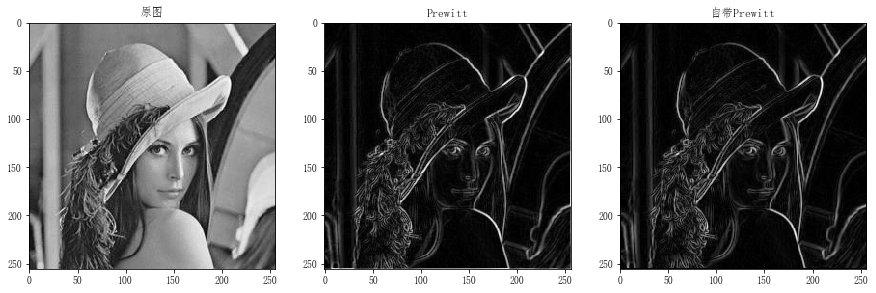

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from skimage import filters
import scipy.signal as ss

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

image = cv2.imread('images/12/Lena.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Threshold=0.04
            
plt.figure(figsize=(15,8), facecolor='w')
plt.subplot(131)
plt.title('原图')
plt.imshow(image_gray, cmap='gray')

plt.subplot(132)
plt.title('Prewitt')
image_prewitt_x = ss.convolve2d(image_gray, np.array([[-1,0,1],
                                                    [-1,0,1],
                                                    [-1,0,1]]), mode="same")
image_prewitt_y = ss.convolve2d(image_gray, np.array([[1,1,1],
                                                      [0,0,0],
                                                      [-1,-1,-1]]), mode="same")
image_prewitt = abs(image_prewitt_x) + abs(image_prewitt_y)
# image_prewitt[(image_prewitt/255) >= Threshold] = 1
plt.imshow(image_prewitt, cmap='gray')

plt.subplot(133)
image_ex = filters.prewitt(image_gray)
plt.title('自带Prewitt')
plt.imshow(image_ex, cmap='gray')
plt.show()

###2.1.2 roberts算子
边缘定位准，但是对噪声敏感。适用于边缘明显且噪声较少的图像分割。Roberts边缘检测算子是一种利用局部差分算子寻找边缘的算子,Robert算子图像处理后结果边缘不是很平滑。经分析，由于Robert算子通常会在图像边缘附近的区域内产生较宽的响应，故采用上述算子检测的边缘图像常需做细化处理，边缘定位的精度不是很高,Roberts边缘算子是一个2x2的模板，采用的是对角方向相邻的两个像素之差
- 水平梯度$\begin{bmatrix}
1&0\\
0&-1
\end{bmatrix}$
- 垂直梯度$\begin{bmatrix}
0&1\\
-1&0
\end{bmatrix}$

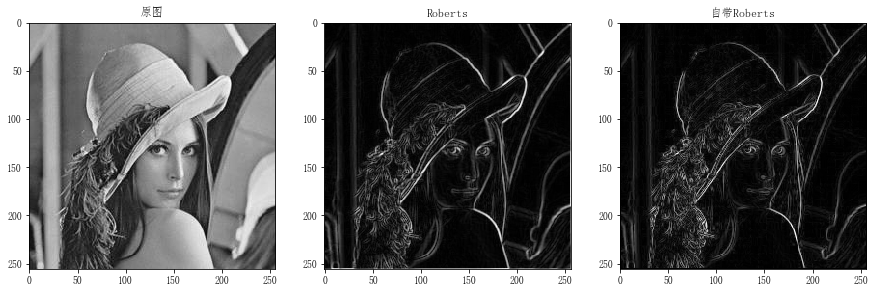

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from skimage import filters
import scipy.signal as ss

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

image = cv2.imread('images/12/Lena.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_roberts = np.ones(image_gray.shape[0] * image_gray.shape[1], dtype=np.uint8) * 0
image_roberts = image_gray.copy()

Threshold=0.06

plt.figure(figsize=(15,8), facecolor='w')
plt.subplot(131)
plt.title('原图')
plt.imshow(image_gray, cmap='gray')

plt.subplot(132)
plt.title('Roberts')
image_roberts_x = ss.convolve2d(image_gray, np.array([[1,0],
                                                      [0,-1]]), mode="same")
image_roberts_y = ss.convolve2d(image_gray, np.array([[0,1],
                                                      [-1,0]]), mode="same")
image_roberts = abs(image_prewitt_x) + abs(image_prewitt_y)
image_roberts = (255/image_roberts.max()) * image_roberts
plt.imshow(image_roberts, cmap='gray')

plt.subplot(133)
image_ex = filters.roberts(image_gray)
plt.title('自带Roberts')
plt.imshow(image_ex, cmap='gray')
plt.show()

###2.1.3 Sobel算子
- 水平梯度$\begin{bmatrix}
-1&0&1\\
-2&0&2\\
-1&0&1
\end{bmatrix}=\begin{bmatrix}
-1&0&1
\end{bmatrix} \bigotimes \begin{bmatrix}
1\\
2\\
1
\end{bmatrix}$
- 垂直梯度$\begin{bmatrix}
-1&-2&-1\\
0&0&0\\
1&2&1
\end{bmatrix}=\begin{bmatrix}
1&2&1
\end{bmatrix} \bigotimes \begin{bmatrix}
-1\\
0\\
1
\end{bmatrix}$

Sobel算子和Prewitt算子都是加权平均，但是Sobel算子认为，邻域的像素对当前像素产生的影响不是等价的，所以距离不同的像素具有不同的权值，对算子结果产生的影响也不同。一般来说，距离越远，产生的影响越小

对于Sobel算子，也可以使用$45^o$角和$135^o$角的边缘检测，卷积核分别是$\begin{bmatrix}
-2&-1&0\\
-1&0&-1\\
0&1&2
\end{bmatrix}\begin{bmatrix}
0&-1&-2\\
1&0&-1\\
2&1&0
\end{bmatrix}$。$45^o$角和$135^o$角边缘检测；用于那些边界不明显的图片，不太适用于复杂图，复杂图用水平和垂直边缘检测

Sobel函数求完导数后会有负值，还有会大于255的值。而原图像是uint8，即8位无符号数，所以Sobel建立的图像位数不够，会有截断。因此要使用16位有符号的数据类型，即cv2.CV_16S

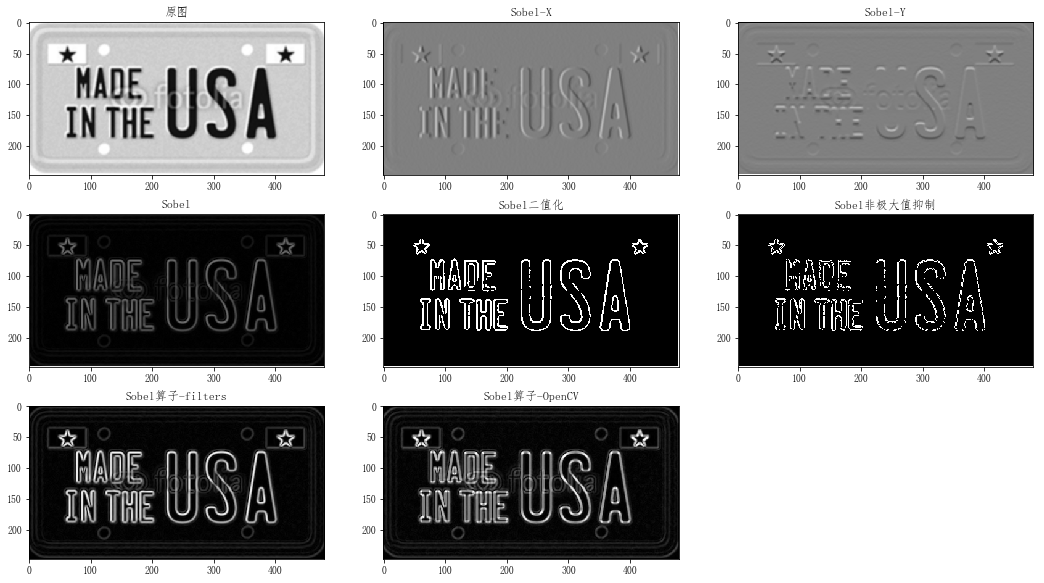

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from skimage import filters
import scipy.signal as ss
import math

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

image = cv2.imread('images/12/USA.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (3,3), sigmaX=1)

row = 3
col = 3
plt.figure(figsize=(18,10), facecolor='w')
plt.subplot(row, col, 1)
plt.title('原图')
plt.imshow(image_gray, cmap='gray')

plt.subplot(row, col, 2)
plt.title('Sobel-X')
SobelX = np.array([[-1, 0, 1],
                   [ -2, 0, 2],
                   [ -1, 0, 1]])
image_x = ss.convolve2d(image_gray, SobelX, mode="same")
plt.imshow(image_x, cmap='gray')

plt.subplot(row, col, 3)
plt.title('Sobel-Y')
SobelY = np.array([[-1,-2,-1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])
image_y = ss.convolve2d(image_gray, SobelY, mode="same")
plt.imshow(image_y, cmap='gray')

grident = image_x* image_x+ image_y * image_y
gridentSqrt = np.sqrt(grident)
b = (255/gridentSqrt.max()) * gridentSqrt

plt.subplot(row, col, 4)
plt.title('Sobel')
image_Sobel = b.copy()
plt.imshow(image_Sobel, cmap='gray')

scale = 4;
cuteoff = scale*np.mean(b)

plt.subplot(row, col, 5)
plt.title('Sobel二值化')
b[b>=cuteoff] = 255
b[b<cuteoff] = 0
plt.imshow(b, cmap='gray')

image_NMS = b.copy()
def get_coords(angle):
    sigma=0.000000001;
    x1=math.ceil(math.cos(angle+math.pi/8)*math.sqrt(2)-0.5-sigma);
    y1=math.ceil(-math.sin(angle-math.pi/8)*math.sqrt(2)-0.5-sigma);
    x2=math.ceil(math.cos(angle-math.pi/8)*math.sqrt(2)-0.5-sigma);
    y2=math.ceil(-math.sin(angle-math.pi/8)*math.sqrt(2)-0.5-sigma);
    return [x1,y1,x2,y2]

for i in range(1, image_gray.shape[0]-1):
    for j in range(1, image_gray.shape[1]-1):
        Mx = image_x[i,j]
        My = image_y[i,j]
        if My != 0:
            o = math.atan(Mx/My)
        elif My == 0 and Mx > 0:
            o = math.pi / 2
        else:
            o = - math.pi / 2

        adds = get_coords(o)
        M1=My*image_Sobel[i+adds[1],j+adds[0]]+(Mx-My)*image_Sobel[i+adds[3],j+adds[2]]
        adds=get_coords(o+math.pi)
        M2=My*image_Sobel[i+adds[1],j+adds[0]]+(Mx-My)*image_Sobel[i+adds[3],j+adds[2]]

        isbigger=(Mx*image_Sobel[i,j]>M1)*(Mx*image_Sobel[i,j]>=M2)+(Mx*image_Sobel[i,j]<M1)*(Mx*image_Sobel[i,j]<=M2)

        if isbigger:
            image_NMS[i,j]=0
        
plt.subplot(row, col, 6)
plt.title('Sobel非极大值抑制')
plt.imshow(image_NMS, cmap='gray')

edges = filters.sobel(image_gray)
plt.subplot(row,col,7)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel算子-filters')

edgesX = cv2.Sobel(image_gray,cv2.CV_16S,1,0)
edgesY = cv2.Sobel(image_gray,cv2.CV_16S,0,1)
absX = cv2.convertScaleAbs(edgesX)   # 转回uint8  
absY = cv2.convertScaleAbs(edgesY)
edges = cv2.addWeighted(absX,0.5,absY,0.5,0)
            
plt.subplot(row,col,8)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel算子-OpenCV')
plt.show()

###2.1.4 图像差分
对于原函数f(u)，差分运算是计算f(u)映射到f(u+a)-f(u+b)的值。差分运算分为前向差分和逆向差分。二维离散图像函数f(x,y)在x和y两个方向上的一阶差分定义如下$$\Delta{f_x}=f(x+1,y)-f(x,y)\\
\Delta{f_y}=f(x,y+1)-f(x,y)
$$
一般使用高斯差分，也就是DoG

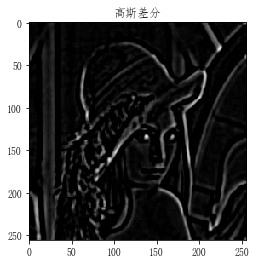

In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters,feature
import matplotlib as mpl

# 打开图像并转化成灰度图像
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

image = cv2.imread('images/12/Lena.png', cv2.IMREAD_GRAYSCALE)

i1 = cv2.GaussianBlur(image, (5,5), 5)
i2 = cv2.GaussianBlur(image, (11,11), 5)
GaussSub = cv2.subtract(i1, i2)
plt.imshow(GaussSub,cmap=plt.cm.gray)
plt.title(u'高斯差分')
plt.show()

##2.2 二阶算子

###2.2.1 Laplacian算子与高斯拉普拉斯
增强边缘信息
公式$\Delta{f}=\frac{\partial^2{f}}{\partial{x}^2}+\frac{\partial^2{f}}{\partial{y}^2}$
- 团块检测：周边高于或低于中心点
- 边缘检测：像素值快速变化的区域

常用的有四种卷积核
- 1D
$$\begin{bmatrix}
1&-2&1
\end{bmatrix}$$
- 2D 4邻域
$$\begin{bmatrix}
0&1&0\\
1&-4&1\\
0&1&0
\end{bmatrix}$$
- 2D 8邻域
$$\begin{bmatrix}
1&1&1\\
1&-8&1\\
1&1&1
\end{bmatrix}$$
- $5*5$
$$\begin{bmatrix}
0&0&1&0&0\\
0&1&2&1&0\\
1&2&-16&2&1\\
0&1&2&1&0\\
0&0&1&0&0\\
\end{bmatrix}$$

它们的特点都是中心的值与周围的值的和是0
![images](../images/12/14.png)

这是二阶微分算子。其具有各向同性，即与坐标轴方向无关，坐标轴旋转后梯度结果不变。但是，其对噪声比较敏感，所以，图像一般先经过平滑处理，因为平滑处理也是用模板进行的，所以，通常的分割算法都是把Laplacian算子和平滑算子结合起来生成一个新的模板。
Laplacian算子一般不以其原始形式用于边缘检测，因为其作为一个二阶导数，Laplacian算子对噪声具有无法接受的敏感性；同时其幅值产生算边缘，这是复杂的分割不希望有的结果；最后Laplacian算子不能检测边缘的方向；

所以Laplacian在分割中所起的作用包括：
- 利用它的零交叉性质进行边缘定位；
- 确定一个像素是在一条边缘暗的一面还是亮的一面；

一般使用的是高斯型拉普拉斯算子（Laplacian of a Gaussian,LoG)，由于二阶导数是线性运算，利用LoG卷积一幅图像与首先使用高斯型平滑函数卷积改图像，然后计算所得结果的拉普拉斯是一样的。所以在LoG公式中使用高斯函数的目的就是对图像进行平滑处理，使用Laplacian算子的目的是提供一幅用零交叉确定边缘位置的图像；图像的平滑处理减少了噪声的影响并且它的主要作用还是抵消由Laplacian算子的二阶导数引起的逐渐增加的噪声影响。
![images](../images/12/10.png)

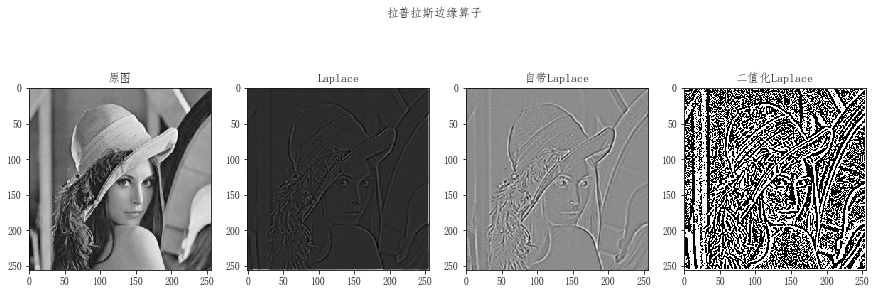

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from skimage import filters
import scipy.signal as ss

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

image = cv2.imread('images/12/Lena.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,5), facecolor='w')
plt.subplot(141)
plt.title('原图')
plt.imshow(image_gray, cmap='gray')

plt.subplot(142)
plt.title('Laplace')
image_gray = cv2.GaussianBlur(image_gray, (3,3), sigmaX=1) #如果不去除高斯噪声，图像很模糊
image_laplac = ss.convolve2d(image_gray, np.array([[0,-1,0],
                                                      [-1,4,-1],
                                                      [0,-1,0]]), mode="same")
image_laplac = (255/image_laplac.max())*image_laplac
plt.imshow(image_laplac, cmap='gray')

plt.subplot(143)
image_ex = cv2.Laplacian(image_gray,cv2.CV_64F)
plt.title('自带Laplace')
plt.imshow(image_ex, cmap='gray')

LaplacianThreshold=0.21
plt.subplot(144)
image_laplac[image_laplac>LaplacianThreshold] = 255
image_laplac[image_laplac<=LaplacianThreshold] = 0
plt.title('二值化Laplace')
plt.imshow(image_laplac, cmap='gray')

plt.suptitle('拉普拉斯边缘算子')
plt.show()

###2.2.2 Canny算子
Canny边缘检测算子是一个多级边缘检测算法。它主要分为四步
1. 使用高斯滤波来消除噪声
2. 计算梯度幅值和方向.x方向的卷积核是$\begin{bmatrix}
-1&+1\\
-1&+1
\end{bmatrix}$，y方向的卷积核是$\begin{bmatrix}
1&1\\
-1&-1
\end{bmatrix}$
3. 非极大值抑制：排除非边缘像素，仅仅保留了一些细线条
4. 滞后阀值：需要两个阀值-高阀值和低阀值.对于Canny函数的使用，推荐的高低阈值比在2:1到3:1之间
	- 如果某一像素位置的幅值超过高阈值, 该像素被保留为边缘像素。
	- 如果某一像素位置的幅值小于低阈值, 该像素被排除。
	- 如果某一像素位置的幅值在两个阈值之间,该像素仅仅在连接到一个高于高阈值的像素时被保留。

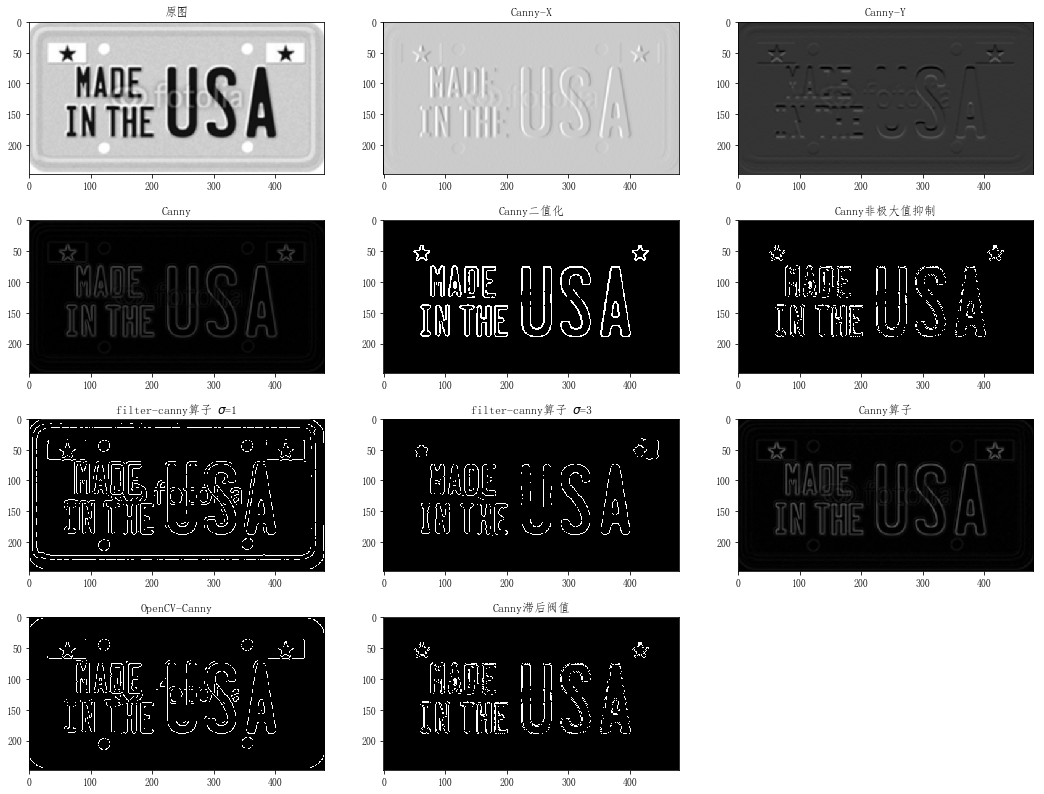

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from skimage import filters
import scipy.signal as ss
import math

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

image = cv2.imread('images/12/USA.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (3,3), sigmaX=1)

row = 4
col = 3
plt.figure(figsize=(18,14), facecolor='w')
plt.subplot(row, col, 1)
plt.title('原图')
plt.imshow(image_gray, cmap='gray')

plt.subplot(row, col, 2)
plt.title('Canny-X')
CannyX = np.array([[-1,+1],
                   [-1,+1]])
image_x = ss.convolve2d(image_gray, CannyX, mode="same")
plt.imshow(image_x, cmap='gray')

plt.subplot(row, col, 3)
plt.title('Canny-Y')
CannyY = np.array([[1, 1],
                   [-1,-1]])
image_y = ss.convolve2d(image_gray, CannyY, mode="same")
plt.imshow(image_y, cmap='gray')

grident = image_x* image_x+ image_y * image_y
gridentSqrt = np.sqrt(grident)
b = (255/gridentSqrt.max()) * gridentSqrt

plt.subplot(row, col, 4)
plt.title('Canny')
image_Sobel = b.copy()
plt.imshow(image_Sobel, cmap='gray')

scale = 4;
cuteoff = scale*np.mean(b)

plt.subplot(row, col, 5)
plt.title('Canny二值化')
b[b>=cuteoff] = 255
b[b<cuteoff] = 0
plt.imshow(b, cmap='gray')

image_NMS = b.copy()
def get_coords(angle):
    sigma=0.000000001;
    x1=math.ceil(math.cos(angle+math.pi/8)*math.sqrt(2)-0.5-sigma);
    y1=math.ceil(-math.sin(angle-math.pi/8)*math.sqrt(2)-0.5-sigma);
    x2=math.ceil(math.cos(angle-math.pi/8)*math.sqrt(2)-0.5-sigma);
    y2=math.ceil(-math.sin(angle-math.pi/8)*math.sqrt(2)-0.5-sigma);
    return [x1,y1,x2,y2]

for i in range(1, image_gray.shape[0]-1):
    for j in range(1, image_gray.shape[1]-1):
        Mx = image_x[i,j]
        My = image_y[i,j]
        if My != 0:
            o = math.atan(Mx/My)
        elif My == 0 and Mx > 0:
            o = math.pi / 2
        else:
            o = - math.pi / 2

        adds = get_coords(o)
        M1=My*image_Sobel[i+adds[1],j+adds[0]]+(Mx-My)*image_Sobel[i+adds[3],j+adds[2]]
        adds=get_coords(o+math.pi)
        M2=My*image_Sobel[i+adds[1],j+adds[0]]+(Mx-My)*image_Sobel[i+adds[3],j+adds[2]]

        isbigger=(Mx*image_Sobel[i,j]>M1)*(Mx*image_Sobel[i,j]>=M2)+(Mx*image_Sobel[i,j]<M1)*(Mx*image_Sobel[i,j]<=M2)

        if isbigger:
            image_NMS[i,j]=0

plt.subplot(row, col, 6)
plt.title('Canny非极大值抑制')
plt.imshow(image_NMS, cmap='gray')

edges = feature.canny(image_gray)
plt.subplot(row,col,7)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'filter-canny算子 $\sigma$=1')

edges = feature.canny(image_gray, sigma=3)
plt.subplot(row,col,8)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'filter-canny算子 $\sigma$=3')

absX = cv2.convertScaleAbs(image_x)   # 转回uint8  
absY = cv2.convertScaleAbs(image_y)
edges = cv2.addWeighted(absX,0.5,absY,0.5,0)
plt.subplot(row,col,9)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Canny算子')

CannyLowTh = 100
CannyUpTh = 120
edges = cv2.Canny(image_gray, CannyLowTh, CannyUpTh)
plt.subplot(row,col,10)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'OpenCV-Canny')

def connect(image_NMS, y, x, CannyLowTh):
    neighbour=[[-1,-1],[-1,0],[-1,1],[0,-1],[0,1],[1,-1],[1,0],[1,1]]
    m = image_NMS.shape[0]
    n = image_NMS.shape[1]
    for k in range(neighbour):
        yy=y+neighbour[k][1]
        xx=x+neighbour[k][2]
        if yy>=1 and yy<=m and xx>=1 and xx<=n:
            if image_NMS[yy,xx] >= CannyLowTh and image_NMS[yy,xx] != 255:
                image_NMS[yy,xx]=255;
                image_NMS=connect(nedge,yy,xx,low)

for i in range(image_NMS.shape[0]):
    for j in range(image_NMS.shape[1]):
        if image_NMS[i,j] > CannyUpTh and image_NMS[i,j] != 255:
            image_NMS[i,j] = 255
            image_NMS=connect(new_edge,i,j,low)

plt.subplot(row, col, 11)
plt.title('Canny滞后阀值')
plt.imshow(image_NMS, cmap='gray')
plt.show()

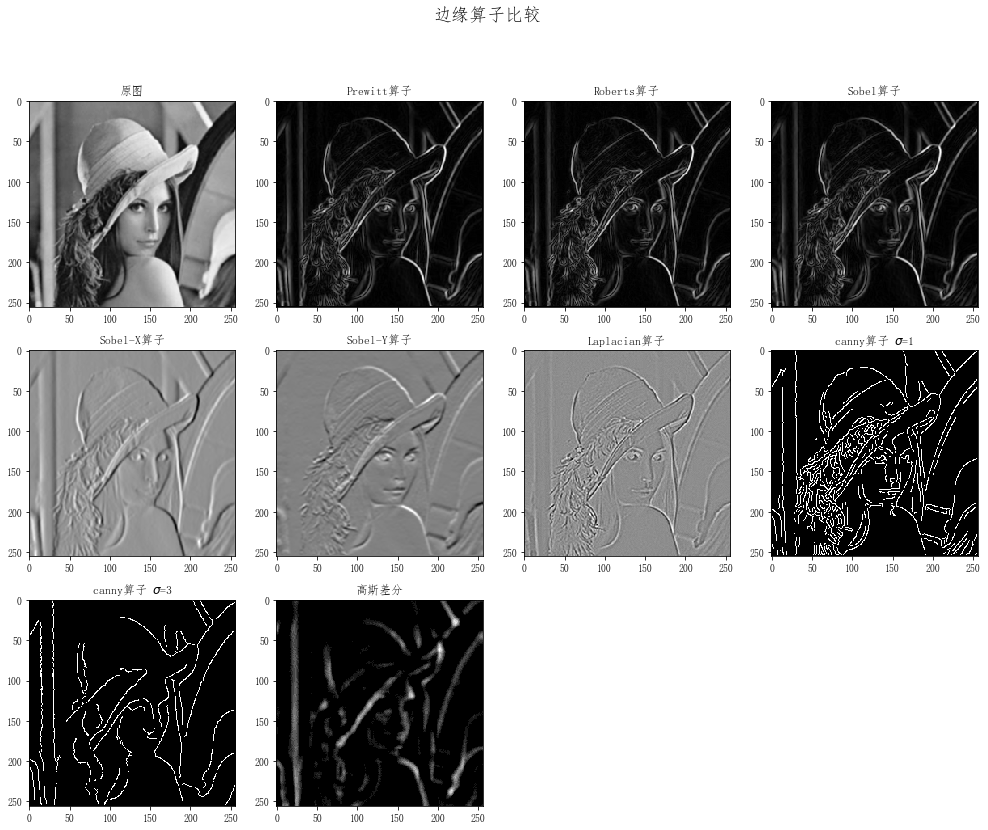

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters,feature
import matplotlib as mpl

# 打开图像并转化成灰度图像
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(17,13), facecolor='w')

image = cv2.imread('images/12/Lena.png', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image
                         ,(3,3),0)
row = 3
col = 4
plt.subplot(row,col,1)
plt.imshow(image,cmap=plt.cm.gray)
plt.title(u'原图')

edges = filters.prewitt(image)
plt.subplot(row,col,2)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Prewitt算子')

edges = filters.roberts(image)
plt.subplot(row,col,3)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Roberts算子')

edges = filters.sobel(image)
plt.subplot(row,col,4)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel算子')

edges = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
plt.subplot(row,col,5)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel-X算子')

edges = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
plt.subplot(row,col,6)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Sobel-Y算子')

edges = cv2.Laplacian(image,cv2.CV_64F)
plt.subplot(row,col,7)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'Laplacian算子')

edges = feature.canny(image)
plt.subplot(row,col,8)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'canny算子 $\sigma$=1')

edges = feature.canny(image, sigma=3)
plt.subplot(row,col,9)
plt.imshow(edges,cmap=plt.cm.gray)
plt.title(u'canny算子 $\sigma$=3')

i1 = cv2.GaussianBlur(image, (15,15), 5)
i2 = cv2.GaussianBlur(image, (21,21), 5)
GaussSub = cv2.subtract(i1, i2)
plt.subplot(row,col,10)
plt.imshow(GaussSub,cmap=plt.cm.gray)
plt.title(u'高斯差分')

plt.suptitle(u'边缘算子比较', fontsize=18)
plt.show()

#3 非极大值抑制
非极大值抑制（NMS）主要是为了更精确的定位某种特征，比如用梯度变化表征边缘时，梯度变化较大的区域通常比较宽，所以利用x和y方向的梯度确定一个法向$arctan(\frac{y}{x})$，然后在法向上判断当前梯度测量是否是一个峰值（或局部极大值），如果是就保留，不是极大值就抑制（如设置为0）。这样的话就能将边缘定位在1-2像素宽（相邻像素有时候求极大值的方向恰好互不干扰），其实主要目的就是为了叫边缘变细